In [27]:
import numpy as np
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("sentiment140dataset/training.1600000.processed.noemoticon.csv", 
                 names=['sentiment','tweet_id','timestamp','useless','username', 'tweet'],
                 encoding='ISO-8859-1')

In [7]:
df.head()

,sentiment,tweet_id,timestamp,useless,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Drop useless columns and format timestamp column

In [23]:
clean_df = df.drop(['sentiment', 'useless', 'username'], axis=1)
form = "%a %b %d %H:%M:%S PDT %Y"
clean_df['timestamp'] = pd.to_datetime(clean_df['timestamp'], format=form)

Create Timeline of Tweets per day

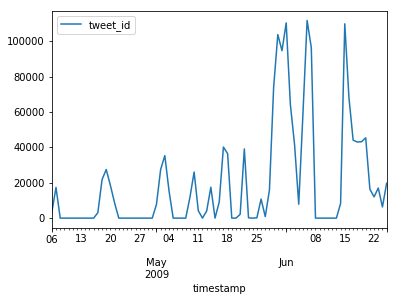

In [29]:
date_counts = clean_df.resample('D', on='timestamp').count()
date_counts.plot(kind='line',y='tweet_id')
plt.show()

In [50]:
only_real_dates = date_counts.where(date_counts['tweet_id']!=0)
only_real_dates.dropna()

,tweet_id,timestamp,tweet
timestamp,,,
2009-04-06,3360.0,3360.0,3360.0
2009-04-07,17311.0,17311.0,17311.0
2009-04-17,3084.0,3084.0,3084.0
2009-04-18,21754.0,21754.0,21754.0
2009-04-19,27469.0,27469.0,27469.0
2009-04-20,18460.0,18460.0,18460.0
2009-04-21,8587.0,8587.0,8587.0
2009-05-01,7716.0,7716.0,7716.0
2009-05-02,27434.0,27434.0,27434.0


Clean tweets up from punctuation and capitalization

In [57]:
import re
clean_df['processed_tweet'] = clean_df['tweet'].map(lambda x: re.sub('[-,\.!?]', '', x))
clean_df['processed_tweet'] = clean_df['processed_tweet'].map(lambda x: " ".join(list(filter(lambda word: not word.startswith("@") and not word.startswith("http"), x.split(" ")))))
clean_df['processed_tweet'] = clean_df['processed_tweet'].map(lambda x: x.lower())

clean_df.head()

,tweet_id,timestamp,tweet,processed_tweet
0,1467810369,2009-04-06 22:19:45,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that's a bummer you shoulda got david c...
1,1467810672,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,1467810917,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,1467811184,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,1467811193,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",no it's not behaving at all i'm mad why am i h...


Found the idea to do exploratory analysis on words using the Wordcloud library here (https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)

In [60]:
# Import the wordcloud library
from wordcloud import WordCloud
def make_wordcloud(dataframe):
    # Join the different processed titles together.
    long_string = ','.join(list(clean_df['processed_tweet'].values))
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    return wordcloud.to_image()

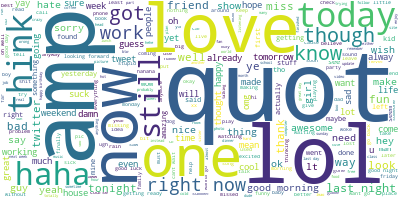

In [61]:
make_wordcloud(clean_df)

So we got minimal stuff out of the wordcloud, I wonder how LDA will do

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english', max_features=10000)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(clean_df['processed_tweet'])

In [87]:
count_data

<1600000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 8802623 stored elements in Compressed Sparse Row format>

In [88]:
import datetime as dt
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
def run_lda(number_topics=5, number_words=10):
    start_time = dt.datetime.now()
    lda = LatentDirichletAllocation(n_components=number_topics, n_jobs=-1, learning_method='online')
    lda.fit(count_data)
    # Print the topics found by the LDA model
    print(f"{number_topics} topics found via LDA with {number_words} words:")
    print_topics(lda, count_vectorizer, number_words)
    print(f"took {(dt.datetime.now() - start).seconds/60} minutes to run this model")

In [ ]:
run_lda()

In [47]:
count_data

<1600000x801771 sparse matrix of type '<class 'numpy.int64'>'
	with 11006230 stored elements in Compressed Sparse Row format>

In [75]:
len(count_vectorizer.stop_words_)

403794